In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print (type(x_train))

<class 'numpy.ndarray'>


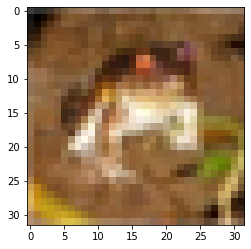

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

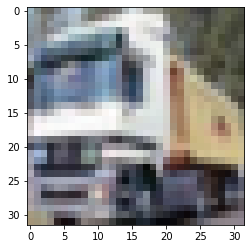

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[1])

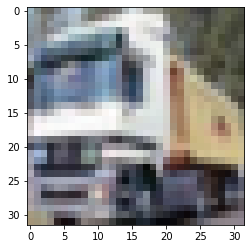

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[1])

In [ ]:
print (y_train[0])

[6]


In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential() 

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=100, validation_split=0.3 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/100





35000/35000 [==============================] - 18s 500us/step - loss: 1.7007 - acc: 0.3858 - val_loss: 1.4331 - val_acc: 0.4831
Epoch 2/100
35000/35000 [==============================] - 2s 65us/step - loss: 1.3535 - acc: 0.5177 - val_loss: 1.2770 - val_acc: 0.5435
Epoch 3/100
35000/35000 [==============================] - 2s 67us/step - loss: 1.2241 - acc: 0.5638 - val_loss: 1.1885 - val_acc: 0.5847
Epoch 4/100
35000/35000 [==============================] - 2s 65us/step - loss: 1.0978 - acc: 0.6099 - val_loss: 1.1400 - val_acc: 0.6001
Epoch 5/100
35000/35000 [==============================] - 2s 64us/step - loss: 0.9983 - acc: 0.6496 - val_loss: 1.0860 - val_acc: 0.6155
Epoch 6/100
35000/35000 [==============================] - 2s 65us/step - loss: 0.9256 - acc: 0.6737 - val_loss: 1.0256 - val_acc: 0.6388
Epoch 7/100
35000/

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 1s 96us/step


0.68

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aeroplane.jpg to aeroplane.jpg


In [ ]:
probabilities

array([[9.9771452e-01, 3.2675672e-07, 1.4149229e-03, 2.9483072e-05,
        6.8133685e-04, 9.2128712e-06, 5.2127663e-05, 7.9369067e-07,
        9.3098541e-05, 4.1695503e-06]], dtype=float32)

In [ ]:
number_to_class = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
#sort the probabilities from least to the greatest
index = np.argsort(probabilities[0,:])

In [ ]:
print("The image is", number_to_class[index[9]], "--Probability:", probabilities[0,index[9]])

The image is airplane --Probability: 0.9977145


In [ ]:
!mkdir model
!tensorflowjs_converter --input_format keras my_model.h5 model/

In [ ]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/group1-shard1of2.bin (deflated 7%)
  adding: model/group1-shard2of2.bin (deflated 7%)
  adding: model/model.json (deflated 79%)


In [ ]:
from google.colab import files
files.download('my_model.h5')